In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Artificial Hustlers 💤.txt', 'r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

23/03/23, 13:49 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
01/04/23, 18:12 - +91 91106 14050: <Media omitted>
01/04/23, 20:18 - +91 80171 02193: You have been invited by M Anupama to join classroom 4th sem AIML
Enroll to Teachmint using:
https://www.teachmint.com/enroll/4282623836/6427fe054eb35f9b56575a62
Classroom ID: 4282623836
Subject: Funamentals of Machinelearning
01/04/23, 20:33 - +91 80171 02193: Everyone keep ur maths notes complete... she'll check ...
Ur attendance 5 mrks is  also depend on ur class notess....

-ASHA MAM
02/04/23, 10:56 - +91 94815 45007: <Media omitted>
03/04/23, 08:57 - +91 91106 14050: Room no 101
03/04/23, 11:01 - +91 80171 02193: This message was deleted
03/04/23, 11:02 - +91 80171 02193: https://forms.gle/oWXoVDHs7JuzkT2v6
03/04/23, 11:03 - +91 80171 02193: Guys fill this form
05/04/23, 12:26 - +91 91106 14050: <Media omitted>
05/04/23, 23:52 - Abrar Navalu

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}'

In [6]:
messages = re.split(pattern, data)[1:]

In [7]:
messages

[' - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' - +91 91106 14050: <Media omitted>\n',
 ' - +91 80171 02193: You have been invited by M Anupama to join classroom 4th sem AIML\nEnroll to Teachmint using:\nhttps://www.teachmint.com/enroll/4282623836/6427fe054eb35f9b56575a62\nClassroom ID: 4282623836\nSubject: Funamentals of Machinelearning\n',
 " - +91 80171 02193: Everyone keep ur maths notes complete... she'll check ...\nUr attendance 5 mrks is  also depend on ur class notess....\n\n-ASHA MAM\n",
 ' - +91 94815 45007: <Media omitted>\n',
 ' - +91 91106 14050: Room no 101\n',
 ' - +91 80171 02193: This message was deleted\n',
 ' - +91 80171 02193: https://forms.gle/oWXoVDHs7JuzkT2v6\n',
 ' - +91 80171 02193: Guys fill this form\n',
 ' - +91 91106 14050: <Media omitted>\n',
 ' - Abrar Navalur SUIET: https://forms.gle/JjpkyMBKT8i3s6876\n',
 ' - Abrar Navalur SUIET: Kindly fill this form

In [8]:
dates = re.findall(pattern, data)

In [9]:
dates

['23/03/23, 13:49',
 '01/04/23, 18:12',
 '01/04/23, 20:18',
 '01/04/23, 20:33',
 '02/04/23, 10:56',
 '03/04/23, 08:57',
 '03/04/23, 11:01',
 '03/04/23, 11:02',
 '03/04/23, 11:03',
 '05/04/23, 12:26',
 '05/04/23, 23:52',
 '05/04/23, 23:52',
 '06/04/23, 13:04',
 '06/04/23, 22:27',
 '06/04/23, 22:27',
 '06/04/23, 22:29',
 '08/04/23, 10:55',
 '08/04/23, 11:19',
 '08/04/23, 11:50',
 '08/04/23, 11:51',
 '08/04/23, 18:48',
 '08/04/23, 18:48',
 '08/04/23, 18:49',
 '08/04/23, 18:49',
 '10/04/23, 11:10',
 '10/04/23, 11:10',
 '10/04/23, 11:36',
 '10/04/23, 11:36',
 '10/04/23, 20:21',
 '10/04/23, 20:21',
 '10/04/23, 20:21',
 '10/04/23, 20:24',
 '10/04/23, 20:24',
 '10/04/23, 20:24',
 '10/04/23, 22:03',
 '10/04/23, 22:03',
 '10/04/23, 22:35',
 '10/04/23, 22:38',
 '11/04/23, 10:03',
 '11/04/23, 10:18',
 '12/04/23, 05:36',
 '12/04/23, 05:36',
 '12/04/23, 05:36',
 '12/04/23, 12:59',
 '12/04/23, 13:43',
 '13/04/23, 10:09',
 '13/04/23, 10:09',
 '13/04/23, 10:09',
 '13/04/23, 10:09',
 '13/04/23, 13:10',


In [10]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'], format = '%d/%m/%y, %H:%M')
df.rename(columns = {'message_date': 'date'}, inplace = True)
df.head()

,user_message,date
0,- Messages and calls are end-to-end encrypted...,2023-03-23 13:49:00
1,- +91 91106 14050: <Media omitted>\n,2023-04-01 18:12:00
2,- +91 80171 02193: You have been invited by M...,2023-04-01 20:18:00
3,- +91 80171 02193: Everyone keep ur maths not...,2023-04-01 20:33:00
4,- +91 94815 45007: <Media omitted>\n,2023-04-02 10:56:00


In [11]:
users = []
messages = []

for message in df['user_message']:
    entry = re.split(r'([\w\s\.+-]+):\s', message, maxsplit = 1)
    if len(entry) > 2:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages

df.drop(columns = ['user_message'], inplace = True)

df.head()

,date,user,message
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df.head()

,date,user,message,year,month
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April


In [16]:
df['day'] = df['date'].dt.day

In [17]:
df.head()

,date,user,message,year,month,day
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2


In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df.head()

,date,user,message,year,month,day,hour
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1,20
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2,10


In [20]:
df['minute'] = df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13,49
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18,12
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20,18
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1,20,33
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2,10,56


In [22]:
df

,date,user,message,year,month,day,hour,minute
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13,49
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18,12
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20,18
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1,20,33
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2,10,56
...,...,...,...,...,...,...,...,...
7189,2024-12-13 20:23:00,- +91 80789 14550,question paper?\n,2024,December,13,20,23
7190,2024-12-13 20:23:00,- +91 90619 58132,😂\n,2024,December,13,20,23
7191,2024-12-14 17:06:00,group_notification,- Your security code with ~ . changed. Tap to...,2024,December,14,17,6
7192,2024-12-14 18:08:00,group_notification,- Your security code with ~ . changed. Tap to...,2024,December,14,18,8


In [23]:
x = df['user'].value_counts().head()

In [24]:
import matplotlib.pyplot as plt

In [25]:
name = x.index
count = x.values

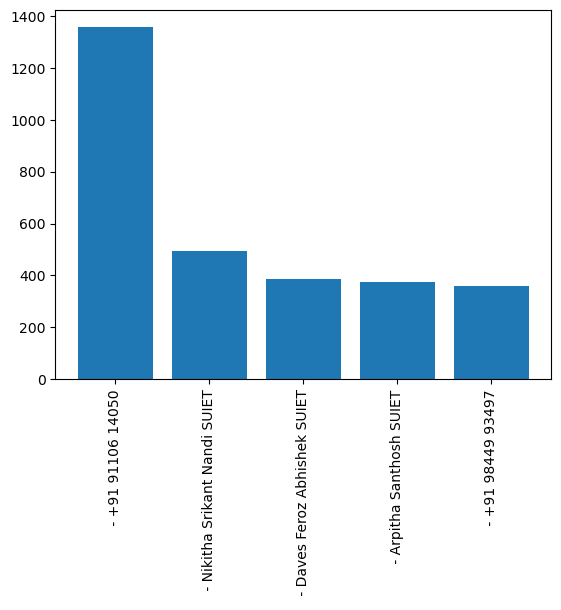

In [26]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [27]:
round((df['user'].value_counts()/df.shape[0]) * 100, 2).reset_index().rename(columns = {'user':'name', 'count':'percent'})

,name,percent
0,- +91 91106 14050,18.85
1,- Nikitha Srikant Nandi SUIET,6.85
2,- Daves Feroz Abhishek SUIET,5.35
3,- Arpitha Santhosh SUIET,5.21
4,- +91 98449 93497,4.99
5,- +91 63611 91045,4.48
6,- +91 86603 51965,4.31
7,- Neha Petkar SUIET,4.06
8,- +91 80171 02193,3.74
9,- Umar Ameer SUIET,3.34


In [28]:
temp = df[df['user'] != 'group_notification']

In [29]:
temp = temp[temp['message'] != '<Media omitted>\n']

In [30]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

#
=
.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [31]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [32]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,505
1,deleted,317
2,class,290
3,lab,182
4,students,165
5,data,157
6,tomorrow,147
7,security,134
8,network,118
9,ma'am,114


In [33]:
!pip install emoji

In [34]:
import emoji

In [35]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [36]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,209
1,🏻,90
2,🔥,75
3,👍,58
4,🤣,51
...,...,...
182,🌙,1
183,💀,1
184,🕊,1
185,💡,1


In [37]:
df['month_num'] = df['date'].dt.month

In [38]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13,49,3
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18,12,4
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20,18,4
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1,20,33,4
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2,10,56,4
...,...,...,...,...,...,...,...,...,...
7189,2024-12-13 20:23:00,- +91 80789 14550,question paper?\n,2024,December,13,20,23,12
7190,2024-12-13 20:23:00,- +91 90619 58132,😂\n,2024,December,13,20,23,12
7191,2024-12-14 17:06:00,group_notification,- Your security code with ~ . changed. Tap to...,2024,December,14,17,6,12
7192,2024-12-14 18:08:00,group_notification,- Your security code with ~ . changed. Tap to...,2024,December,14,18,8,12


In [42]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [43]:
timeline.shape

(22, 4)

In [45]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [47]:
timeline['time'] = time

In [48]:
timeline

,year,month_num,month,message,time
0,2023,3,March,1,March-2023
1,2023,4,April,109,April-2023
2,2023,5,May,411,May-2023
3,2023,6,June,297,June-2023
4,2023,7,July,611,July-2023
5,2023,8,August,216,August-2023
6,2023,9,September,291,September-2023
7,2023,10,October,355,October-2023
8,2023,11,November,625,November-2023
9,2023,12,December,311,December-2023


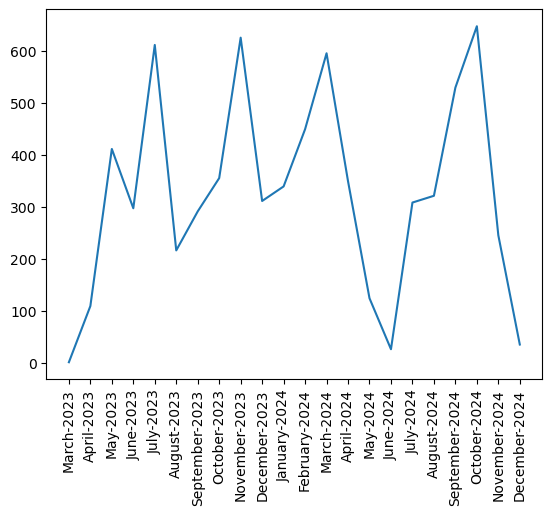

In [50]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
df['only_date'] = df['date'].dt.date

In [56]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

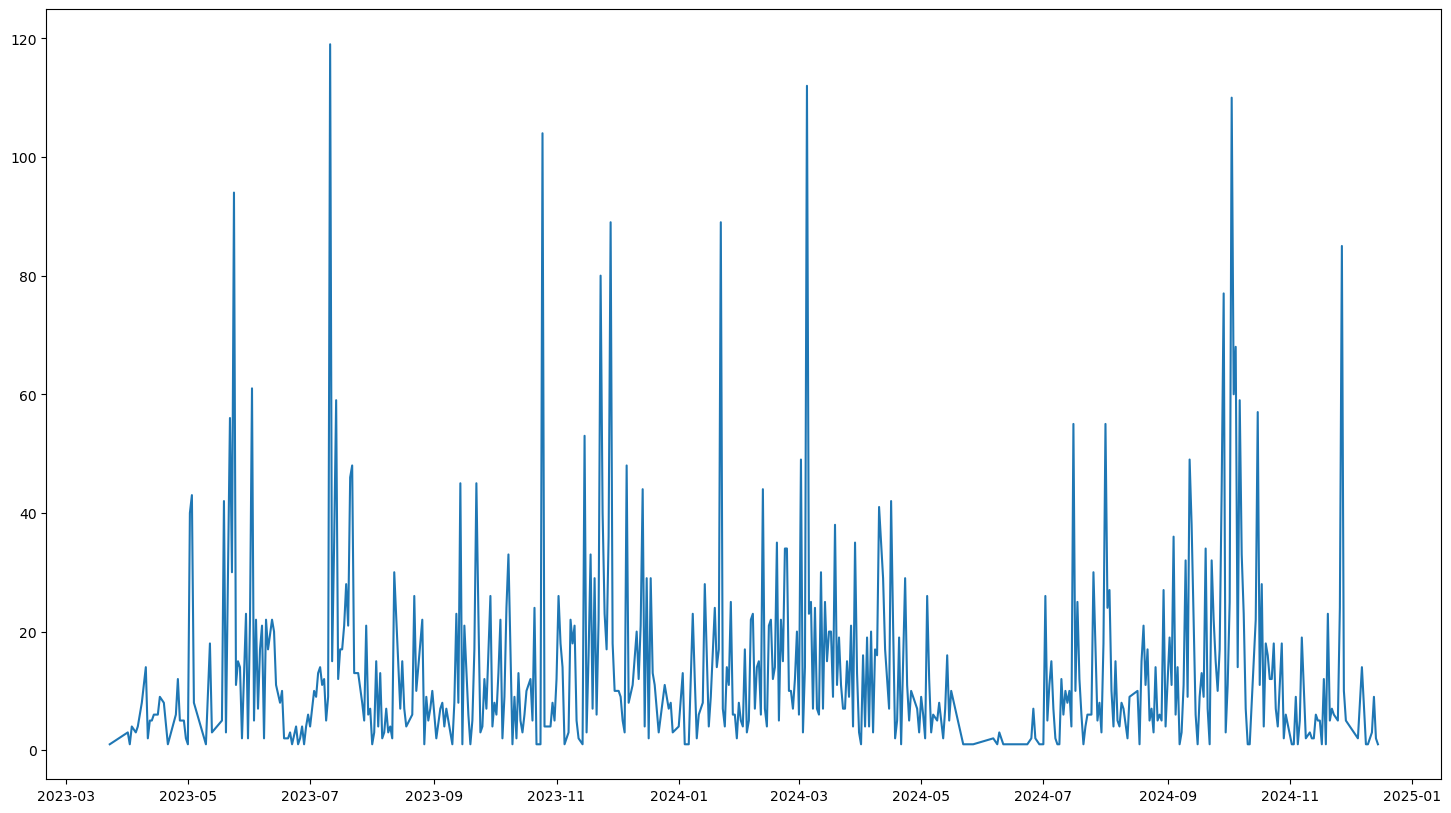

In [64]:
plt.figure(figsize = (18, 10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [66]:
df['day_name'] = df['date'].dt.day_name()

In [67]:
df['day_name'].value_counts()

day_name
Wednesday    1310
Tuesday      1264
Friday       1117
Thursday     1076
Saturday     1028
Monday        926
Sunday        473
Name: count, dtype: int64

In [68]:
df.head(3)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13,49,3,2023-03-23,Thursday
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18,12,4,2023-04-01,Saturday
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20,18,4,2023-04-01,Saturday


In [69]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [70]:
df['period'] = period

In [71]:
df.head(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2023-03-23 13:49:00,group_notification,- Messages and calls are end-to-end encrypted...,2023,March,23,13,49,3,2023-03-23,Thursday,13-14
1,2023-04-01 18:12:00,- +91 91106 14050,<Media omitted>\n,2023,April,1,18,12,4,2023-04-01,Saturday,18-19
2,2023-04-01 20:18:00,- +91 80171 02193,You have been invited by M Anupama to join cla...,2023,April,1,20,18,4,2023-04-01,Saturday,20-21
3,2023-04-01 20:33:00,- +91 80171 02193,Everyone keep ur maths notes complete... she'l...,2023,April,1,20,33,4,2023-04-01,Saturday,20-21
4,2023-04-02 10:56:00,- +91 94815 45007,<Media omitted>\n,2023,April,2,10,56,4,2023-04-02,Sunday,10-11


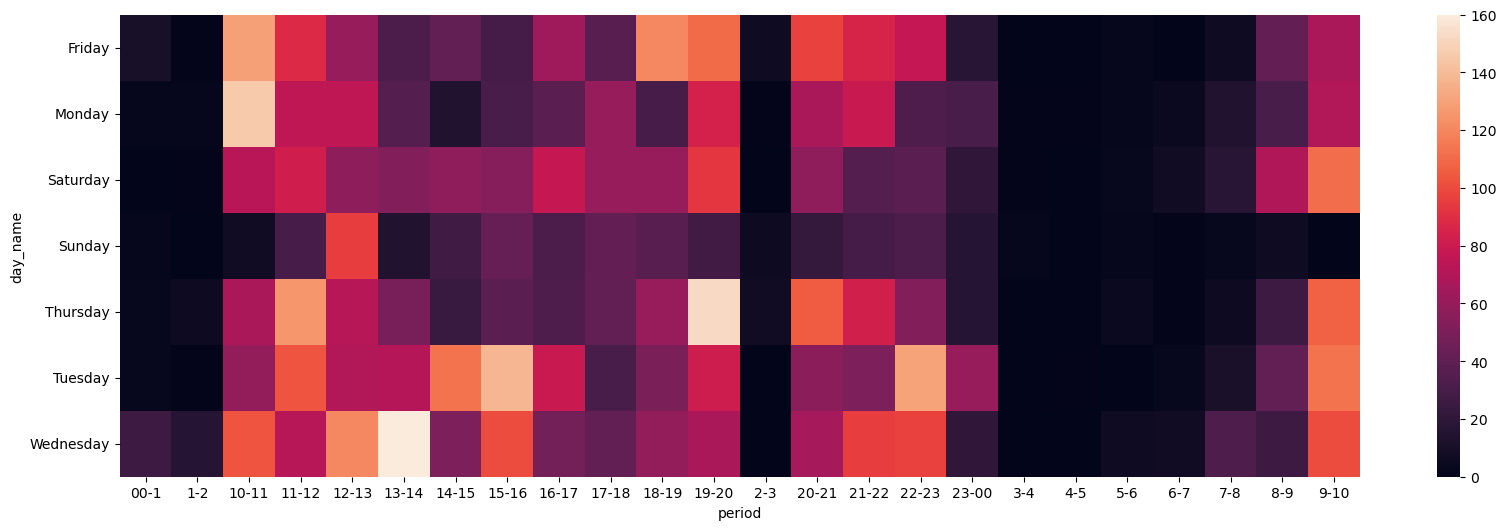

In [72]:
import seaborn as sns
plt.figure(figsize = (20, 6))
sns.heatmap(df.pivot_table(index = 'day_name', columns = 'period', values = 'message', aggfunc = 'count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()

In [73]:
df.pivot_table(index = 'day_name', columns = 'period', values = 'message', aggfunc = 'count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,10.0,1.0,129.0,88.0,60.0,32.0,40.0,29.0,63.0,37.0,...,85.0,77.0,17.0,0.0,0.0,2.0,0.0,6.0,41.0,67.0
Monday,2.0,2.0,146.0,75.0,75.0,35.0,14.0,31.0,38.0,60.0,...,79.0,33.0,31.0,1.0,1.0,2.0,4.0,14.0,31.0,70.0
Saturday,0.0,1.0,73.0,82.0,57.0,53.0,58.0,54.0,78.0,60.0,...,35.0,38.0,20.0,1.0,0.0,3.0,7.0,17.0,69.0,111.0
Sunday,2.0,0.0,7.0,30.0,95.0,14.0,27.0,42.0,32.0,41.0,...,29.0,32.0,16.0,2.0,0.0,2.0,1.0,3.0,6.0,0.0
Thursday,3.0,5.0,68.0,125.0,72.0,49.0,24.0,38.0,33.0,40.0,...,83.0,53.0,16.0,0.0,0.0,4.0,1.0,5.0,25.0,107.0
Tuesday,3.0,1.0,59.0,103.0,70.0,71.0,113.0,138.0,79.0,31.0,...,51.0,130.0,60.0,0.0,1.0,0.0,3.0,11.0,40.0,113.0
Wednesday,26.0,16.0,103.0,72.0,120.0,160.0,51.0,100.0,47.0,40.0,...,95.0,97.0,20.0,0.0,0.0,6.0,7.0,33.0,25.0,100.0
